# Tipos de frontera en clasificación

Para estudiar distintos tipos de fronteras, se trabajará con un dataset sintético, el cual se genera a continuación. Este dataset y esá conformado por dos conjuntos de datos, uno que es generado de una distribución multivariada gaussiana, y el otro, es generado a través de senos y cosenos.

In [1]:
from sklearn.utils import check_random_state
import numpy as np

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T

generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

In [2]:
print len(datos1)
print len(datos2)

500
500


A continuación se presenta una visualización de los datos originales que se obtienen en el dataset sintético.

In [4]:
import matplotlib.pyplot as plt
def visualize(x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    plt.title(title)
    plt.show()

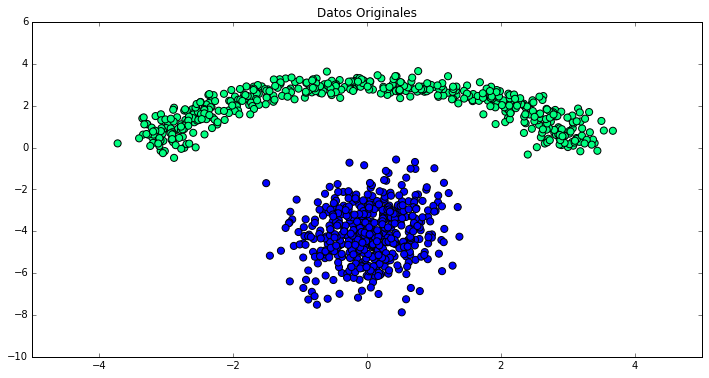

In [5]:
X = np.concatenate((datos1, datos2), axis=0)
y1 = np.zeros(datos1.shape[0])
y2 = np.ones(datos2.shape[0])
y = np.concatenate((y1,y2),axis=0)

visualize(X,y,"Datos Originales")

In [6]:
print len(X)
print len(y)
print len(y1)
print len(y2)

1000
1000
500
500


De estos datos es posible ver que la gaussiana multivariada está representada por los puntos azules con forma ovalada, mientras que los datos de los senos y cosenos están representados por los puntps verdes que forman una semi-luna.

(a) Construya el conjunto de datos (dataset) com´un con los dos conjuntos generados. Luego se realiza un
shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color
naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con
el mismo prop´osito de trabajar con un dataset no ideal. **Determine cu´antos registros contiene cada
conjunto y visual´ıcelos.**

A continuación se realiza un *shift* entre datos de los conjuntos, es decir, 20 datos del conjunto de datos de la semi-luna pasan a ser parte del conjunto de datos del ovalo. Lo anterior, es posible visualizarlo en el siguiente diagrama, en donde parte de la derecha de los datos verdes pasaron a ser azules. Este *shift* o ruido que se le agrega a los datos se realiza para trabajar con un dataset no ideal.

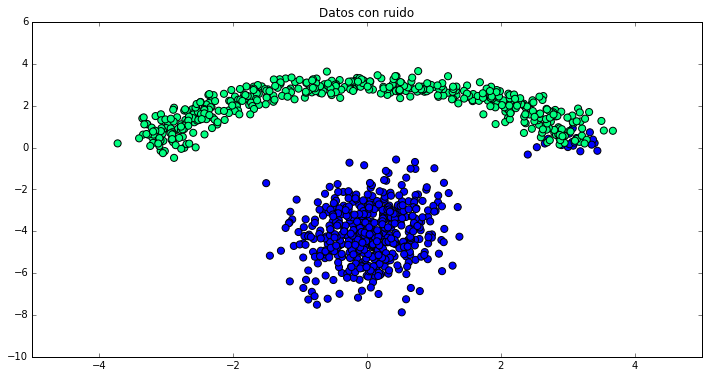

In [7]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

visualize(X,y,"Datos con ruido")

In [8]:
print "Azules: " + str(len(y1))
print "Verdes: " + str(len(y2))

Azules: 520
Verdes: 480


Originalmente cada conjunto de datos tiene 500 elementos, pero luego del *shift*, el conjunto de datos verde tiene 480 elementos y el conjunto de datos azules tiene 520 elementos.

In [9]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisi´on que
define este algoritmo. **Analice cualitativamente lo que observa.**

Luego se entrena un clasificador Linear Discriminant Analysis (LDA), el cual intenta separar los dos conjuntos de datos mediante una combinación lineal de los 

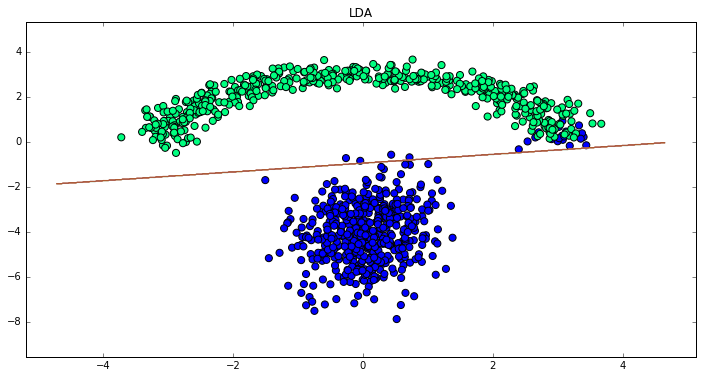

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
visualize_border(model,X,y,"LDA")

Se puede observar...ad

(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisi´on que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qu´e difieren y
en qu´e se asemejan ¿Qu´e distribuci´on de probabilidad asumen cada uno?

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

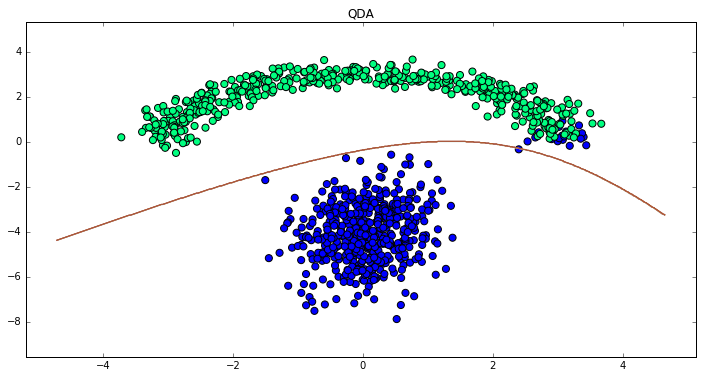

In [12]:
visualize_border(model,X,y,"QDA")

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sint´etico mediante la m´etrica
de error de clasificaci´on.

In [13]:
from sklearn.metrics import accuracy_score
#Para QDA
y_true = y
y_pred = model.predict(X)


print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred)))

Miss Classification Loss: 0.019000


Para lo que sigue de la actividad se trabajar´a con una widget interactiva [2] para sintonizar los par´ametros
de regularizaci´on de los distintos algoritmos. Por ello cada vez que se modifique el par´ametro en la ventana
se entrenar´a el modelo y se visualizar´a la frontera en la misma imagen.

In [14]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

(e) Construya una funci´on que entrene/ajuste un modelo de Regresi´on Log´ıstica Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del par´ametro de regularizaci´on
mediante el gr´afico interactivo. Explique el significado y efecto esperado de este par´ametro. Analice
cualitativamente lo observado.

In [15]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model = LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.0 #define your range
p_max = 1000.0#define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

(f) Construya una funci´on que entrene/ajuste una M´aquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del par´ametro de regularizaci´on C. Discuta el significado
y efecto esperado de este par´ametro. Analice cualitativamente lo observado.

In [16]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

p_min = 0.0 #define your range
p_max = 1000.0#define your range
interactive(visualize_border_interactive,param=(p_min,p_max))#use interactive

(g) Construya una funci´on que entrene/ajuste una M´aquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del par´ametro de regularizaci´on C y con
diferentes kernels. Discuta el significado y efecto esperado de este par´ametro. Analice cualitativamente
lo observado.

In [19]:
#edit the train_model function
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

def visualize_border_interactive_svm(param, ker):
    model = train_model_svm(param,ker)
    visualize_border(model,X,y)
    
    
def train_model_svm(param, ker):
    model= SVM()
    model.set_params(C=param,kernel=ker)
    model.fit(X,y)
    return model

p_min = 0.0 #define your range
p_max = 1000.0#define your range
interactive(visualize_border_interactive_svm,param=(p_min,p_max), ker='rbf')

(h) Construya un Arbol de Decisi´on de m´ultiples niveles para la clasificaci´on del problema. Puede utilizar ´
el criterio y la funci´on de partici´on que prefiera. Mediante la imagen interactiva explore diferentes
valores del par´ametro de m´axima profunidad del ´arbol. Discuta el significado y efecto esperado de este
par´ametro. Analice cualitativamente lo observado.

In [22]:
from sklearn.tree import DecisionTreeClassifier as Tree

def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

p_min = 0.0 #define your range
p_max = 10000.0#define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

(i) Construya un algoritmo k-NN para la clasificaci´on del problema. Mediante la imagen interactiva explore
diferentes valores del par´ametro k. Discuta el significado y efecto esperado de este par´ametro. Analice
cualitativamente lo observado.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

p_min = 0 #define your range
p_max = 1000#define your range
interactive(visualize_border_interactive,param=(p_min,p_max))